In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

In [2]:
path = "../processed/train/evaluated/mistralai-Mistral-7B-Instruct-v0_2_4_similarity_evaluated_01_03_2024.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,id,instructions,text,kgw-watermarked,non-watermarked,pp-kgw-1,pp-unwatermarked-1,pp-kgw-2,pp-unwatermarked-2,pp-kgw-3,...,non-wm-zscore,kgw-wm-pp-zscore-1,non-wm-pp-zscore-1,kgw-wm-pp-zscore-2,non-wm-pp-zscore-2,kgw-wm-pp-zscore-3,non-wm-pp-zscore-3,pp-sim-1,pp-sim-2,pp-sim-3
0,87DF9FF7104D,\nTask: Write an essay discussing how technolo...,"Albert Einsteins said "" I am afraid that one d...",Title: The Perils of Technology: A Threat to ...,Title: Technology's Negative Impact: The Loss...,The advent of technology has significantly alt...,"Technology, which was once thought of as a too...",The development of technology has greatly chan...,"“The use of technology, once thought of as a m...",The reliance on technology is harmful. The dev...,...,2.412217,2.611165,0.349927,0.617213,0.723747,0.077850,0.535303,0.665505,0.574978,0.595853
1,E45C9BFE63FA,\nTask: Research Thomas Jefferson's life and w...,"THOMAS JEFFERSON WROTE, ''determine never to b...",Thomas Jefferson was a monumental figure in A...,"Thomas Jefferson, a Founding Father and the t...",Thomas Jefferson was a great figure in America...,"The name of Thomas Jefferson, the father of th...","“Thomson,” said Jefferson, “was a great figure...",From the time of his birth of the Declaration ...,"""Thomson,"" said Jefferson, ""was a great figure...",...,0.832494,1.154701,1.441153,-1.088662,1.780903,-1.906412,0.595491,0.774975,0.684016,0.709281
2,EDFFA0E4D88C,\nTask: Analyze the pros and cons of having a ...,Should school weeks consist on four days with ...,title: A Four-Day School Week With Longer Hou...,In proposing a 4-day school week with ten hou...,A four-day school week with ten hours of class...,"In the proposed four-day school week, there ar...",A four-day schoolweek with ten hours of classe...,The disadvantages are the costs of keeping a h...,It would also add to the burden of the working...,...,-0.516825,2.653614,-0.104542,1.480872,-0.762073,1.450647,1.032796,0.858470,0.780790,0.741388
3,F6194DEBEFA7,\nTask: Analyze and explore the benefits of im...,Teenage is a part of life where everyone wants...,title: The Impact of Implementing a Curfew fo...,Title: The Significance of Curfews for Teenag...,Incorporating social comradery and early-night...,- The importance of a curfew for teenagers: Pr...,"In addition, social co-operation and early ris...",The existence of a strict discipline for teena...,A curfew may significantly improve the welfare...,...,1.097260,-0.632456,0.222222,-0.337869,-0.124515,0.404226,0.298142,0.627816,0.546899,0.523823


In [5]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [6]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [7]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-wm-pp-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"non-wm-pp-zscore-{i}"]

In [8]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [9]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 11.9442, pp mean: 0.9563
base std: 0.9336, pp mean: 1.0398


In [10]:
image_path = "../results/images/z_score_comparisons_february/"

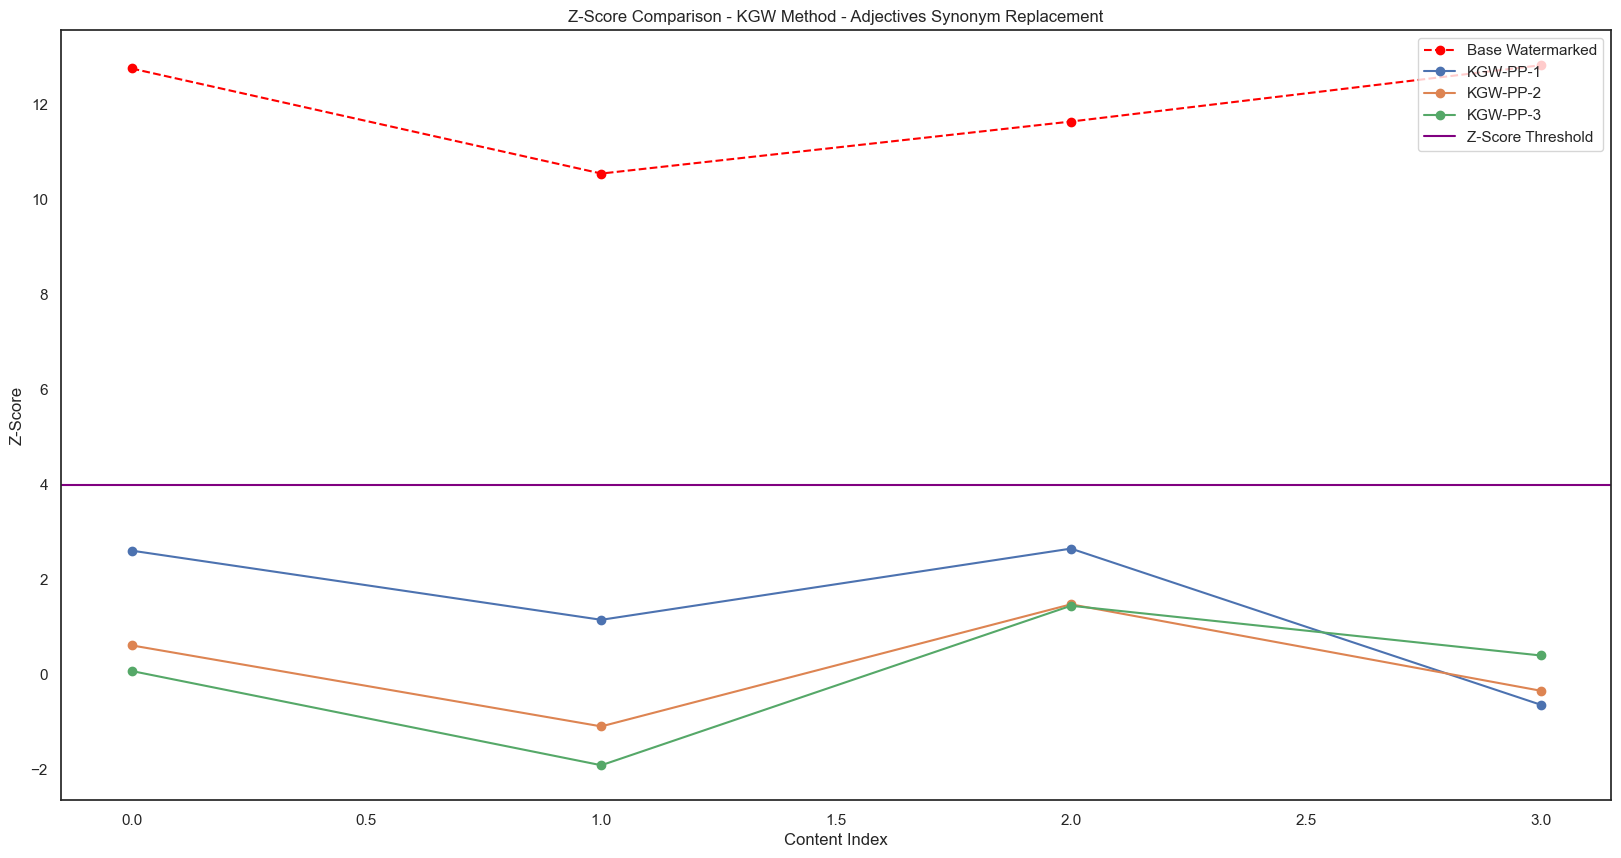

In [11]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(no_of_paraphrases):
    axs.plot(list(range(len(kgw_wm_zscore))), wmarked_paraphrased_scores[i], label=f"KGW-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method - Adjectives Synonym Replacement")
axs.legend(loc='upper right')
# plt.savefig(image_path+"word_replaced_kgw_20%.png")
plt.show()

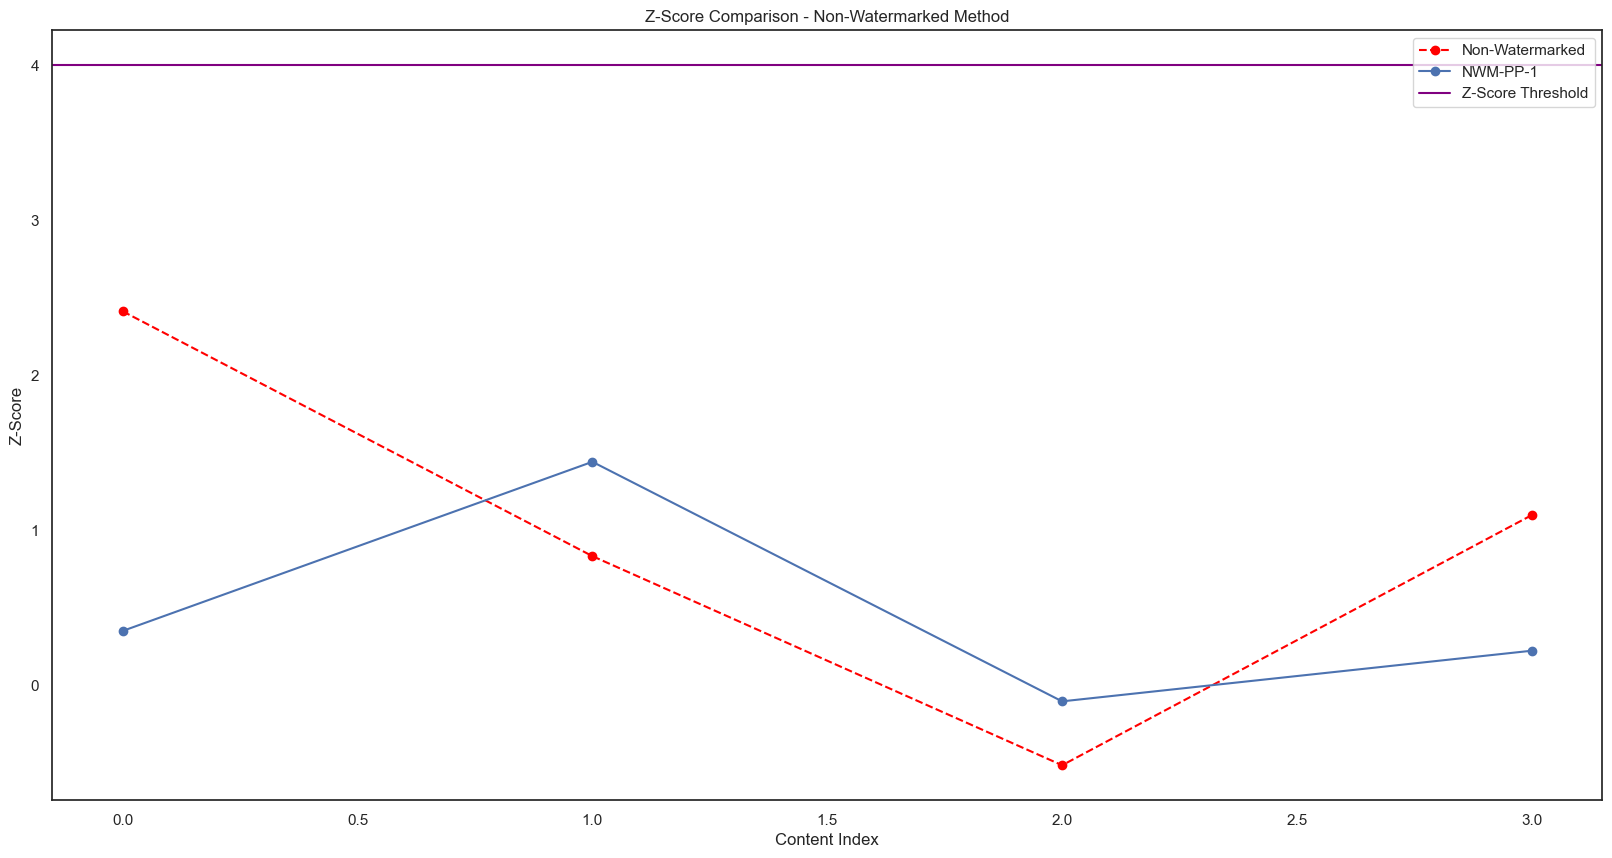

In [12]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(non_wm_zscore))), non_wm_zscore, label="Non-Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(1):
    axs.plot(list(range(len(non_wm_zscore))), nmarked_paraphrased_scores[i], label=f"NWM-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Non-Watermarked Method")
axs.legend(loc='upper right')
# plt.savefig(image_path+"kgw_zscore_non_wmarked_project.png")
plt.show()

## Scatter Plot Visualisation

In [13]:
df.columns

Index(['id', 'instructions', 'text', 'kgw-watermarked', 'non-watermarked',
       'pp-kgw-1', 'pp-unwatermarked-1', 'pp-kgw-2', 'pp-unwatermarked-2',
       'pp-kgw-3', 'pp-unwatermarked-3', 'kgw-wm-zscore', 'non-wm-zscore',
       'kgw-wm-pp-zscore-1', 'non-wm-pp-zscore-1', 'kgw-wm-pp-zscore-2',
       'non-wm-pp-zscore-2', 'kgw-wm-pp-zscore-3', 'non-wm-pp-zscore-3',
       'pp-sim-1', 'pp-sim-2', 'pp-sim-3'],
      dtype='object')

In [14]:
kgw_z_scores = df["kgw-wm-zscore"]
kgw_pp_z_scores = df["kgw-wm-pp-zscore-1"]

In [15]:
np.min(kgw_pp_z_scores)

-0.6324555320336759

In [16]:
import os 
os.getcwd()

'C:\\Users\\Sam\\Desktop\\level4-proj\\data\\notebooks'

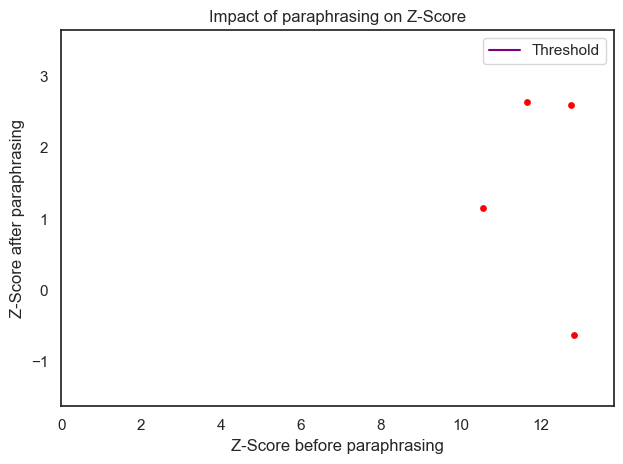

In [17]:
fig, axs = plt.subplots()

axs.scatter(kgw_z_scores, kgw_pp_z_scores, s=15, color='red')

axs.set_xlabel("Z-Score before paraphrasing")
axs.set_ylabel("Z-Score after paraphrasing")

left = min(0, np.min(kgw_z_scores)-1)
right = max(kgw_z_scores)+1
bottom = min(0, np.min(kgw_pp_z_scores)-1)
top = max(kgw_pp_z_scores) + 1

axs.set_xlim(left=left, right=right)
axs.set_ylim(bottom=bottom, top=top)
axs.axhline(4.0, label='Threshold', color='purple')

# axs.axvline(0, c='black', ls='--') 
# axs.axhline(0, c='black', ls='--') 

axs.set_title("Impact of paraphrasing on Z-Score")

plt.legend()
plt.tight_layout()
# plt.savefig("../results/images/mistral-7b-january/scatter-comparison.png", bbox_inches='tight')
plt.show()